In [4]:
import pandas as pd
import numpy as np
import html5lib
from matplotlib import dates
from statsmodels.tsa.filters.hp_filter import hpfilter
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
import requests

In [7]:
headers = {'User-agent': 'Custom User Agent'}
response = requests.get('https://www.worldometers.info/coronavirus/', headers=headers)
tables = pd.read_html(response.text)

In [10]:
general_df = tables[0]

In [11]:
#this part reads the table from the web
import urllib.request as request
import csv
r = request.urlopen('https://raw.githubusercontent.com/RamiKrispin/coronavirus-csv/master/coronavirus_dataset.csv').read().decode('utf8').split("\n")
reader = csv.reader(r)
A=[]
for line in reader:
    A.append(line)

In [12]:
#tables = pd.read_html("https://www.worldometers.info/coronavirus/")
#general_df = tables[0]

In [13]:
general_df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,1stcase
0,USA,105778,"+1,652",1731.0,+35,2538.0,101509,2494.0,320.0,5.0,Jan 20
1,Italy,86498,NaN,9134.0,NaN,10950.0,66414,3732.0,1431.0,151.0,Jan 29
2,Spain,72248,"+6,529",5812.0,+674,12285.0,54151,4165.0,1545.0,124.0,Jan 30
3,Germany,53340,"+2,469",399.0,+48,6658.0,46283,1581.0,637.0,5.0,Jan 26
4,Iran,35408,"+3,076",2517.0,+139,11679.0,21212,3206.0,422.0,30.0,Feb 18


In [14]:
general_df['death_rate'] = general_df['TotalDeaths']/general_df['TotalCases']*100
general_df.columns

Index(['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop',
       'Deaths/1M pop', '1stcase', 'death_rate'],
      dtype='object')

In [17]:
#general_df.rename(columns={"Tot Cases/1M pop": "CasesIn1Mil"}, inplace=True)
general_df.columns = ['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'CasesIn1Mil', 'DeathsIn1Mil', '1stcase',
       'death_rate']

In [18]:
general_df3 = general_df.nlargest(15,'TotalCases')

In [19]:
general_df2 = general_df3.groupby(['Country,Other', 'CasesIn1Mil']).agg({'death_rate': ['sum']})
general_df2.columns = ['death_rate']
general_df2 = general_df2.reset_index()
#general_df2 = general_df2.set_index(df2['date'])
#df2.drop(['date'],axis=1,inplace=True)

In [20]:
#general_df2

In [21]:
general_df2.sort_values('death_rate',inplace=True)

In [22]:
general_df2.rename(columns={"Country,Other": "Country", "death_rate": "Death Rate"}, inplace=True)

In [23]:
#general_df2['Cases in 1 Million of pop.'] = 
#general_df['Tot Cases/1M pop']

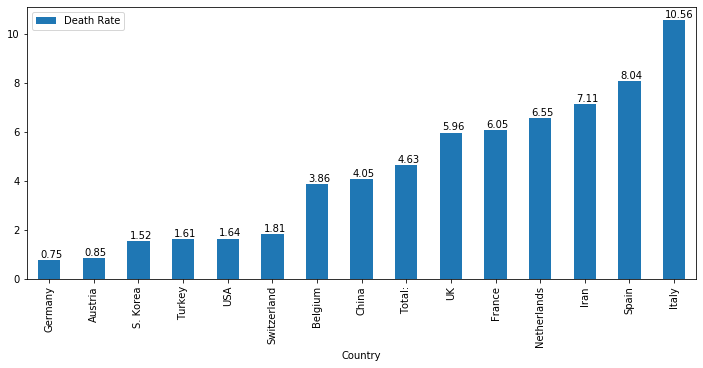

In [24]:
#list_of_values = ['Iran', 'China', 'USA', 'Germany', 'Italy', 'Spain', 'France', 'S. Korea', 'Switzerland', 'UK', 'Netherlands', 'Belgium', 'Austria']
ax=general_df2.plot.bar(x='Country', y=['Death Rate'], stacked=True, figsize=(12,5))
x_offset = -0.2
y_offset = 0.1
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
#.sort_values('death_rate').head(10)
#

In [25]:
general_df2.sort_values('CasesIn1Mil',inplace=True)

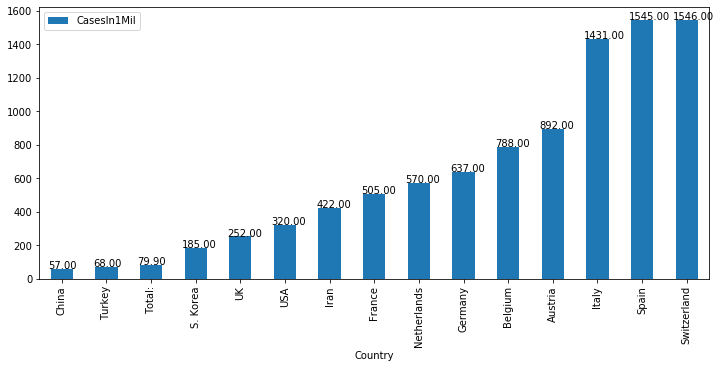

In [26]:
ax=general_df2.plot.bar(x='Country', y=['CasesIn1Mil'], stacked=True, figsize=(12,5))
x_offset = -0.3
y_offset = 1.5
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
#.sort_values('death_rate').head(10)
#

In [27]:
#making the dataframe with column names
df = pd.DataFrame(A[1:],columns=A[0])

In [28]:
#converting the cases from object to numeric
df['cases'] = pd.to_numeric(df['cases'])

In [29]:
df['date']=pd.to_datetime(df['date'])
df = df.set_index(df['date'])
df.drop(['date'],axis=1,inplace=True)
#df.head()

In [30]:
df.head()

,Province.State,Country.Region,Lat,Long,cases,type
date,,,,,,
2020-01-22,,Afghanistan,33,65,0.0,confirmed
2020-01-23,,Afghanistan,33,65,0.0,confirmed
2020-01-24,,Afghanistan,33,65,0.0,confirmed
2020-01-25,,Afghanistan,33,65,0.0,confirmed
2020-01-26,,Afghanistan,33,65,0.0,confirmed


In [31]:
df2 = df.groupby([df.index, 'type', 'Country.Region']).agg({'cases': ['sum']})
df2.columns = ['cases']
df2 = df2.reset_index()
df2 = df2.set_index(df2['date'])
df2.drop(['date'],axis=1,inplace=True)

In [32]:
#df2[df2['Country.Region']=='Iran']
#df2[(df2['Country.Region']=='Iran') & (df['type']=='confirmed')].plot(x=df4['cases'].cumsum(),y= df4['cases'])
#

In [33]:
df2['type'].unique()

array(['confirmed', 'death'], dtype=object)

In [34]:
df4 = df2.groupby(['Country.Region', 'type']).agg({'cases': ['sum']})
df4.columns = ['cases']
df4 = df4.reset_index()
#df2 = df2.set_index(df2['date'])
#df2.drop(['date'],axis=1,inplace=True)

In [35]:
df4.head()

,Country.Region,type,cases
0,Afghanistan,confirmed,110.0
1,Afghanistan,death,4.0
2,Albania,confirmed,186.0
3,Albania,death,8.0
4,Algeria,confirmed,409.0


In [36]:
hottest= (df4[df4['type']=='confirmed'].nlargest(10,'cases')['Country.Region']).to_numpy()

In [37]:
hottest[0]

'US'

In [38]:
df1 = df.groupby([df.index, 'type']).agg({'cases': ['sum']})
df1.columns = ['cases']
df1 = df1.reset_index()

In [39]:
df1 = df1.set_index(df1['date'])
df1.drop(['date'],axis=1,inplace=True)

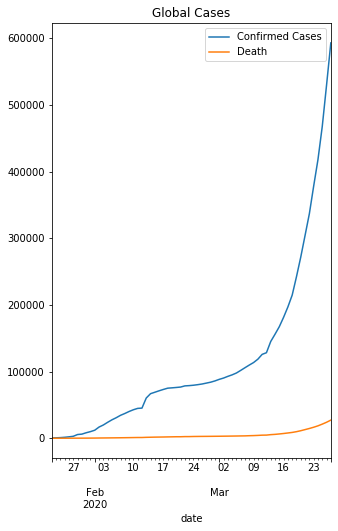

In [40]:
title='Global Cases'
ylabel='Number of Cases'
xlabel='Date'
df1[df1['type']=='confirmed']['cases'].cumsum().plot(figsize=(12,5),title=title)
df1[df1['type']=='death']['cases'].cumsum().plot(figsize=(5,8)).legend(['Confirmed Cases', 'Death'])
#df1[df1['type']=='recovered']['cases'].cumsum().plot(figsize=(12,5))
#(df1[df1['type']=='confirmed']['cases'].cumsum() - df1[df1['type']=='recovered']['cases'].cumsum() - df1[df1['type']=='death']['cases'].cumsum()).plot(figsize=(5,8)).legend(['Active Cases', 'Death', 'Recovered', 'Active Cases'])

In [41]:
df1['EWMA2'] = df1[df1['type']=='confirmed']['cases'].cumsum().ewm(span=2,adjust=False).mean()

In [42]:
df1['confirmed_cum'] = df1[df1['type']=='confirmed']['cases'].cumsum()
#df1['EWMA2'].plot()

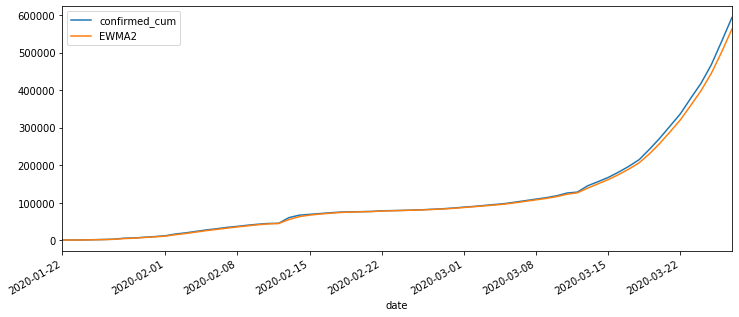

In [43]:
df1[['confirmed_cum','EWMA2']].plot(figsize=(12,5))

In [44]:
hottest1= (df4[df4['type']=='confirmed'].nlargest(10,'cases')['Country.Region']).to_numpy()

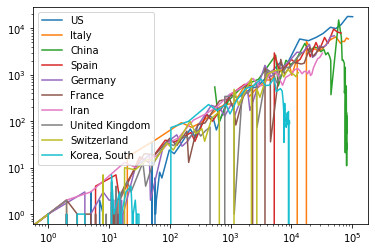

In [45]:
title='Trajectory of confirmed COVID-19 cases'
ylabel='New Confirmed Cases'
xlabel='Total Confirmed Cases'
leg=[]
for country in hottest1:
    leg.append(country)
    check = df2[(df2['Country.Region']==country) & (df2['type']=='confirmed')]
    plt.plot(check['cases'].cumsum(),check['cases'], label=country)

plt.legend()
plt.xscale('log')
plt.yscale('log')

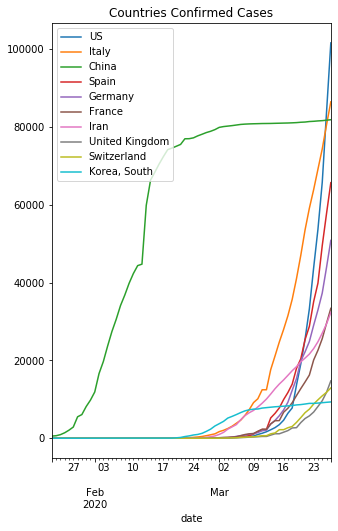

In [46]:
title='Countries Confirmed Cases'
ylabel='Number of Cases'
xlabel='Date'
leg=[]
for country in hottest:
    leg.append(country)
    df2[(df2['Country.Region']==country) & (df2['type']=='confirmed')]['cases'].cumsum().plot(figsize=(5,8),title=title).legend(leg)
#df2[(df2['Country.Region']=='Italy') & (df2['type']=='confirmed')]['cases'].cumsum().plot(figsize=(12,5),title=title)
#df2[(df2['Country.Region']=='Spain') & (df2['type']=='confirmed')]['cases'].cumsum().plot(figsize=(12,5),title=title)
#df2[(df2['Country.Region']=='Iran') & (df2['type']=='confirmed')]['cases'].cumsum().plot(figsize=(12,5),title=title)
#df2[(df2['Country.Region']=='Germany') & (df2['type']=='confirmed')]['cases'].cumsum().plot(figsize=(12,5),title=title)
#df2[(df2['Country.Region']=='US') & (df2['type']=='confirmed')]['cases'].cumsum().plot(figsize=(12,5),title=title)
#df2[(df2['Country.Region']=='France') & (df2['type']=='confirmed')]['cases'].cumsum().plot(figsize=(5,8),title=title).legend(['China', 'Italy', 'Spain', 'Iran', 'Germany', 'USA', 'France'])

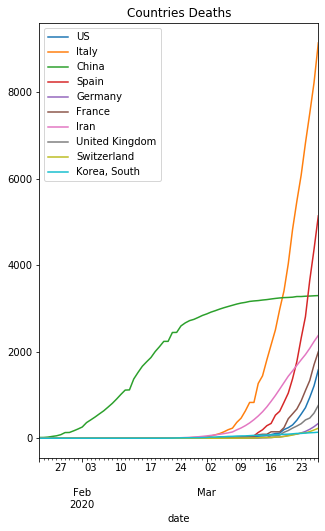

In [47]:
title='Countries Deaths'
ylabel='Number of Cases'
xlabel='Date'
leg=[]
for country in hottest:
    leg.append(country)
    df2[(df2['Country.Region']==country) & (df2['type']=='death')]['cases'].cumsum().plot(figsize=(5,8),title=title).legend(leg)
#df2[(df2['Country.Region']=='China') & (df2['type']=='death')]['cases'].cumsum().plot(figsize=(12,5),title=title)
#df2[(df2['Country.Region']=='Italy') & (df2['type']=='death')]['cases'].cumsum().plot(figsize=(12,5),title=title)
#df2[(df2['Country.Region']=='Spain') & (df2['type']=='death')]['cases'].cumsum().plot(figsize=(12,5),title=title)
#df2[(df2['Country.Region']=='Iran') & (df2['type']=='death')]['cases'].cumsum().plot(figsize=(12,5),title=title)
#df2[(df2['Country.Region']=='Germany') & (df2['type']=='death')]['cases'].cumsum().plot(figsize=(12,5),title=title)
#df2[(df2['Country.Region']=='US') & (df2['type']=='death')]['cases'].cumsum().plot(figsize=(12,5),title=title)
#df2[(df2['Country.Region']=='France') & (df2['type']=='death')]['cases'].cumsum().plot(figsize=(5,8),title=title).legend(['China', 'Italy', 'Spain', 'Iran', 'Germany', 'US', 'France'])

In [48]:
title='Countries Recoveries'
ylabel='Number of Cases'
xlabel='Date'
leg=[]
for country in hottest:
    leg.append(country)
    df2[(df2['Country.Region']==country) & (df2['type']=='recovered')]['cases'].cumsum().plot(figsize=(12,6),title=title).legend(leg)


TypeError: no numeric data to plot

In [49]:
df1['EWMA2'] = df1['cases'].ewm(span=2,adjust=False).mean()

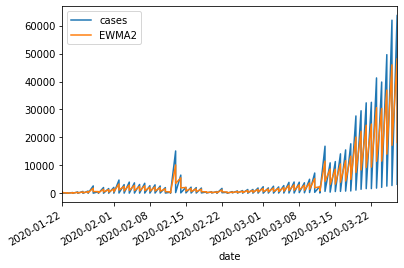

In [50]:
df1[['cases','EWMA2']].plot();

In [54]:
df_it = df[(df['Country.Region']=='Italy')]

TypeError: no numeric data to plot

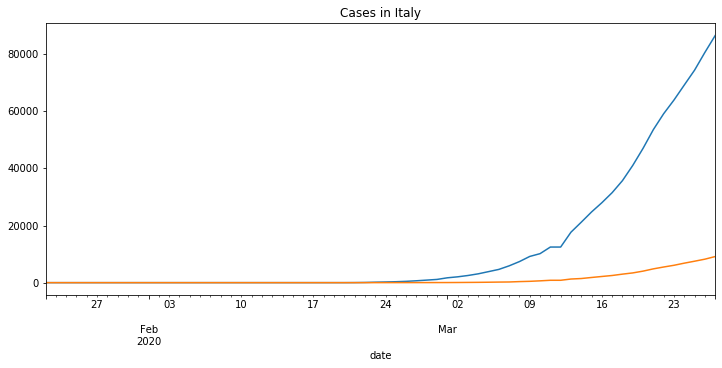

In [52]:
title='Cases in Italy'
ylabel='Number of Cases'
xlabel='Date'
df_it[df_it['type']=='confirmed']['cases'].cumsum().plot(figsize=(12,5),title=title)
df_it[df_it['type']=='death']['cases'].cumsum().plot(figsize=(12,5))
df_it[df_it['type']=='recovered']['cases'].cumsum().plot(figsize=(12,5))
(df_it[df_it['type']=='confirmed']['cases'].cumsum() - df_it[df_it['type']=='recovered']['cases'].cumsum() - df_it[df_it['type']=='death']['cases'].cumsum()).plot(figsize=(12,5)).legend(['Active Cases', 'Death', 'Recovered', 'Active Cases'])

In [56]:
import matplotlib.pyplot as plt

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_it['cases'], model='additive')  # model='mul' also works
result.plot();

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [ ]:
df2.head()